# Decision Trees
### Decision trees intuitively seem to a better idea then then regressions in thise case where most of the features are categorical which fit the structure of trees well. 
#### In this notebook, I will try decision tree model on norm training data and then the one hot encoded version

In [1]:
import numpy as np
import pandas as pd
from utils import *
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.base import clone
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

### firstly, try the model on one hot encoded data

In [45]:
df = pd.read_csv('use_data_dummy.csv').drop(columns = ['Unnamed: 0','store_nbr'])
train_df, test_df = make_cutoffs(df, 90, 15, stride = 30)

In [3]:
train_df.head(3)

,date,sales,onpromotion,oil_price,holiday,type_A,type_B,type_C,type_D,type_E,...,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,cutoff
0,2013-01-01,0.0,0,93.14,0.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2013-01-01
1,2013-01-01,0.0,0,93.14,0.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2013-01-01
2,2013-01-01,0.0,0,93.14,0.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2013-01-01


In [4]:
test_df.head(3)

,date,sales,onpromotion,oil_price,holiday,type_A,type_B,type_C,type_D,type_E,...,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,cutoff
2970,2013-04-01,0.0,0,97.1,0.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2013-01-01
2971,2013-04-01,0.0,0,97.1,0.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2013-01-01
2972,2013-04-01,1.0,0,97.1,0.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2013-01-01


In [46]:
tree_reg, tree_name = DecisionTreeRegressor(max_depth=200), 'Decision Tree max_dep= 10'
tree_result_1 = over_cutoffs(tree_reg, tree_name , train_df, test_df, show_process = True)

5 cutoffs processed
10 cutoffs processed
15 cutoffs processed
20 cutoffs processed
25 cutoffs processed
30 cutoffs processed
35 cutoffs processed
40 cutoffs processed
45 cutoffs processed
50 cutoffs processed


In [48]:
tree_result_1.head()

,cutoff,model,MSE
0,2014-08-24,Decision Tree max_dep= 10,1.166631e+06
1,2014-03-27,Decision Tree max_dep= 10,8.182061e+05
2,2014-05-26,Decision Tree max_dep= 10,9.004673e+05
3,2015-10-18,Decision Tree max_dep= 10,1.134668e+06
4,2015-08-19,Decision Tree max_dep= 10,1.071753e+06


### Try with the no-dummy data

In [13]:
df_2 = pd.read_csv('use_data.csv').drop(columns = ['Unnamed: 0','store_nbr'])

In [17]:
df_2.head()

,date,family,sales,onpromotion,city,state,type,cluster,oil_price,holiday
0,2013-01-01,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,0.0
1,2013-01-01,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,0.0
2,2013-01-01,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,0.0
3,2013-01-01,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,0.0
4,2013-01-01,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,0.0


#### we can see that for this data we need to conver the categotical features to int category indicator

In [26]:
### family
f = df_2[['family']].drop_duplicates().reset_index().rename(columns = {'index':'family_id'})
c = df_2[['city']].drop_duplicates(ignore_index=True).reset_index().rename(columns = {'index':'city_id'})
s = df_2[['state']].drop_duplicates(ignore_index=True).reset_index().rename(columns = {'index':'state_id'})
t = df_2[['type']].drop_duplicates(ignore_index=True).reset_index().rename(columns = {'index':'type_id'})
df_2 = df_2.merge(f,on = 'family')
df_2 = df_2.merge(c,on = 'city')
df_2 = df_2.merge(s,on = 'state')
df_2 = df_2.merge(t,on = 'type')
df_2.drop(columns = ['family','city','state','type'],inplace = True)
df_2.head()


,date,sales,onpromotion,cluster,oil_price,holiday,family_id,city_id,state_id,type_id
0,2013-01-01,0.0,0,13,93.14,0.0,0,0,0,0
1,2013-01-02,2.0,0,13,93.14,0.0,0,0,0,0
2,2013-01-03,3.0,0,13,92.97,0.0,0,0,0,0
3,2013-01-04,3.0,0,13,93.12,0.0,0,0,0,0
4,2013-01-05,5.0,0,13,93.20,0.0,0,0,0,0


In [42]:
#df_2.to_csv('use_data_int.csv')
train_df_2, test_df_2 = make_cutoffs(df_2, 90, 15, stride = 30)

In [43]:
tree_reg, tree_name = DecisionTreeRegressor(max_depth=200), 'Decision Tree norm data'
tree_result_2 = over_cutoffs(tree_reg, tree_name , train_df_2, test_df_2, show_process = True)

5 cutoffs processed
10 cutoffs processed
15 cutoffs processed
20 cutoffs processed
25 cutoffs processed
30 cutoffs processed
35 cutoffs processed
40 cutoffs processed
45 cutoffs processed
50 cutoffs processed


In [44]:
# tree_result_2.to_csv('tree_norm.csv')

### Comparing the results of trees 

In [10]:
one_hot = pd.read_csv('tree_one_hot.csv').drop(columns = 'Unnamed: 0')
normal = pd.read_csv('tree_norm.csv').drop(columns = 'Unnamed: 0')

In [11]:
one_hot['model'] = 'tree_by_one_hot'
normal['model'] = 'tree_by_normal_data'

In [25]:
normal['cutoff'] = pd.to_datetime(normal['cutoff'])

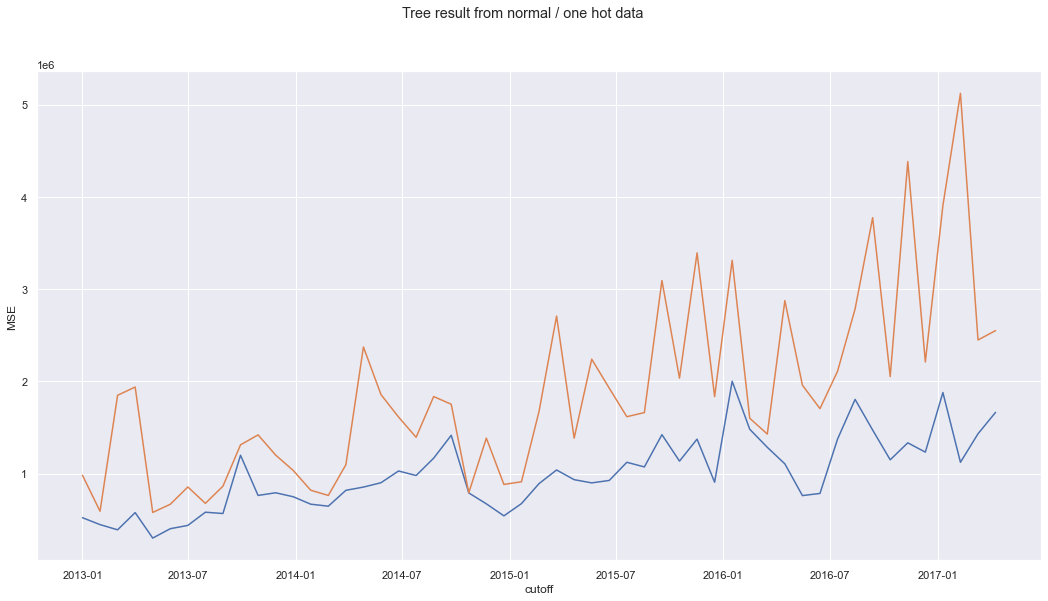

In [26]:
# ploting result
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(18,9))
fig.suptitle('Tree result from normal / one hot data')

sns.lineplot(ax = axes, data = one_hot, x = 'cutoff', y = 'MSE')
sns.lineplot(ax = axes, data = normal, x = 'cutoff', y = 'MSE')
#sns.lineplot(ax = axes[0], data = las_result, x = 'cutoff', y = 'MSE')

plt.savefig('tree_compare.jpg')

### From the plot, we can see that even for tree model, the one-hot encoded data makes more sense, next we try to use the adaboost to possibly improve the model

In [3]:
df = pd.read_csv('use_data_dummy.csv').drop(columns = ['Unnamed: 0','store_nbr'])
train_df, test_df = make_cutoffs(df, 90, 15, stride = 30)

In [4]:
train_df.head()

,date,sales,onpromotion,oil_price,holiday,type_A,type_B,type_C,type_D,type_E,...,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,cutoff
0,2013-01-01,0.0,0,93.14,0.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2013-01-01
1,2013-01-01,0.0,0,93.14,0.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2013-01-01
2,2013-01-01,0.0,0,93.14,0.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2013-01-01
3,2013-01-01,0.0,0,93.14,0.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2013-01-01
4,2013-01-01,0.0,0,93.14,0.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2013-01-01


In [7]:
ada_reg =  AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=200), n_estimators=50
)
reg_name = 'adaboost_tree'
tree_result_3 = over_cutoffs(ada_reg, reg_name , train_df, test_df, show_process = True)


5 cutoffs processed
10 cutoffs processed
15 cutoffs processed
20 cutoffs processed
25 cutoffs processed
30 cutoffs processed
35 cutoffs processed
40 cutoffs processed
45 cutoffs processed
50 cutoffs processed


In [27]:
#tree_result_3.to_csv('ada_tree.csv')

In [22]:
one_hot['cutoff'] = pd.to_datetime(one_hot['cutoff'])

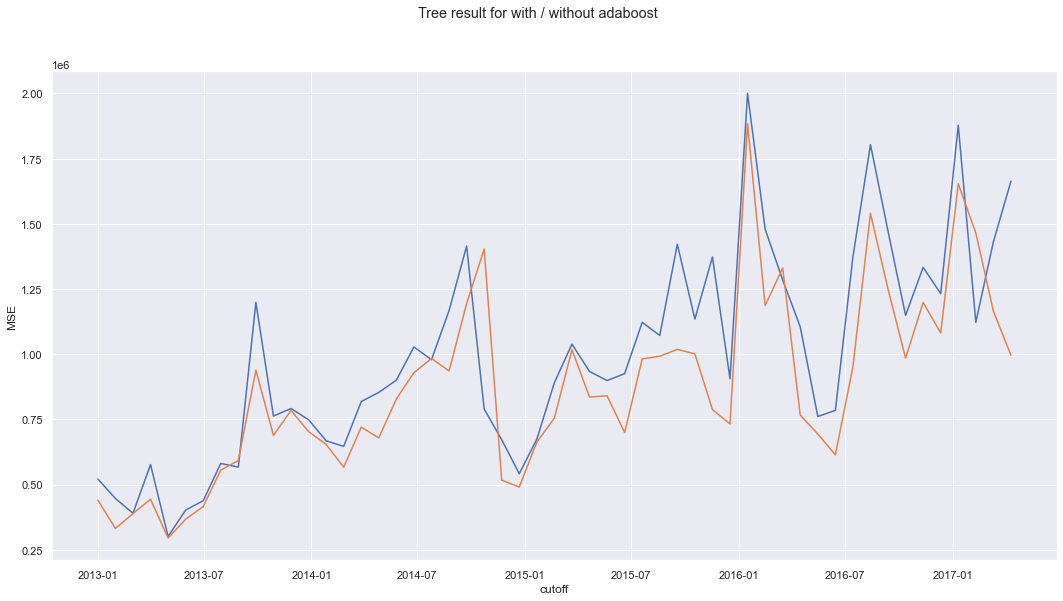

In [28]:
# ploting result
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(18,9))
fig.suptitle('Tree result for with / without adaboost')

sns.lineplot(ax = axes, data = one_hot, x = 'cutoff', y = 'MSE')
sns.lineplot(ax = axes, data = tree_result_3, x = 'cutoff', y = 'MSE')


#plt.savefig('ada_tree.jpg')